<a href="https://colab.research.google.com/github/guanshenwang/dscamp_public/blob/master/Project%20Object%20Recognition/Tutorials/2%20Model%20Optimization/pt2_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Optimization Methods

Now, you will learn some optimization methods that can speed up the learning 
and may even get you to the better fitting values for the cost function.

Gradient descent goes "downhill" on a cost function . Think of it as trying to do this:
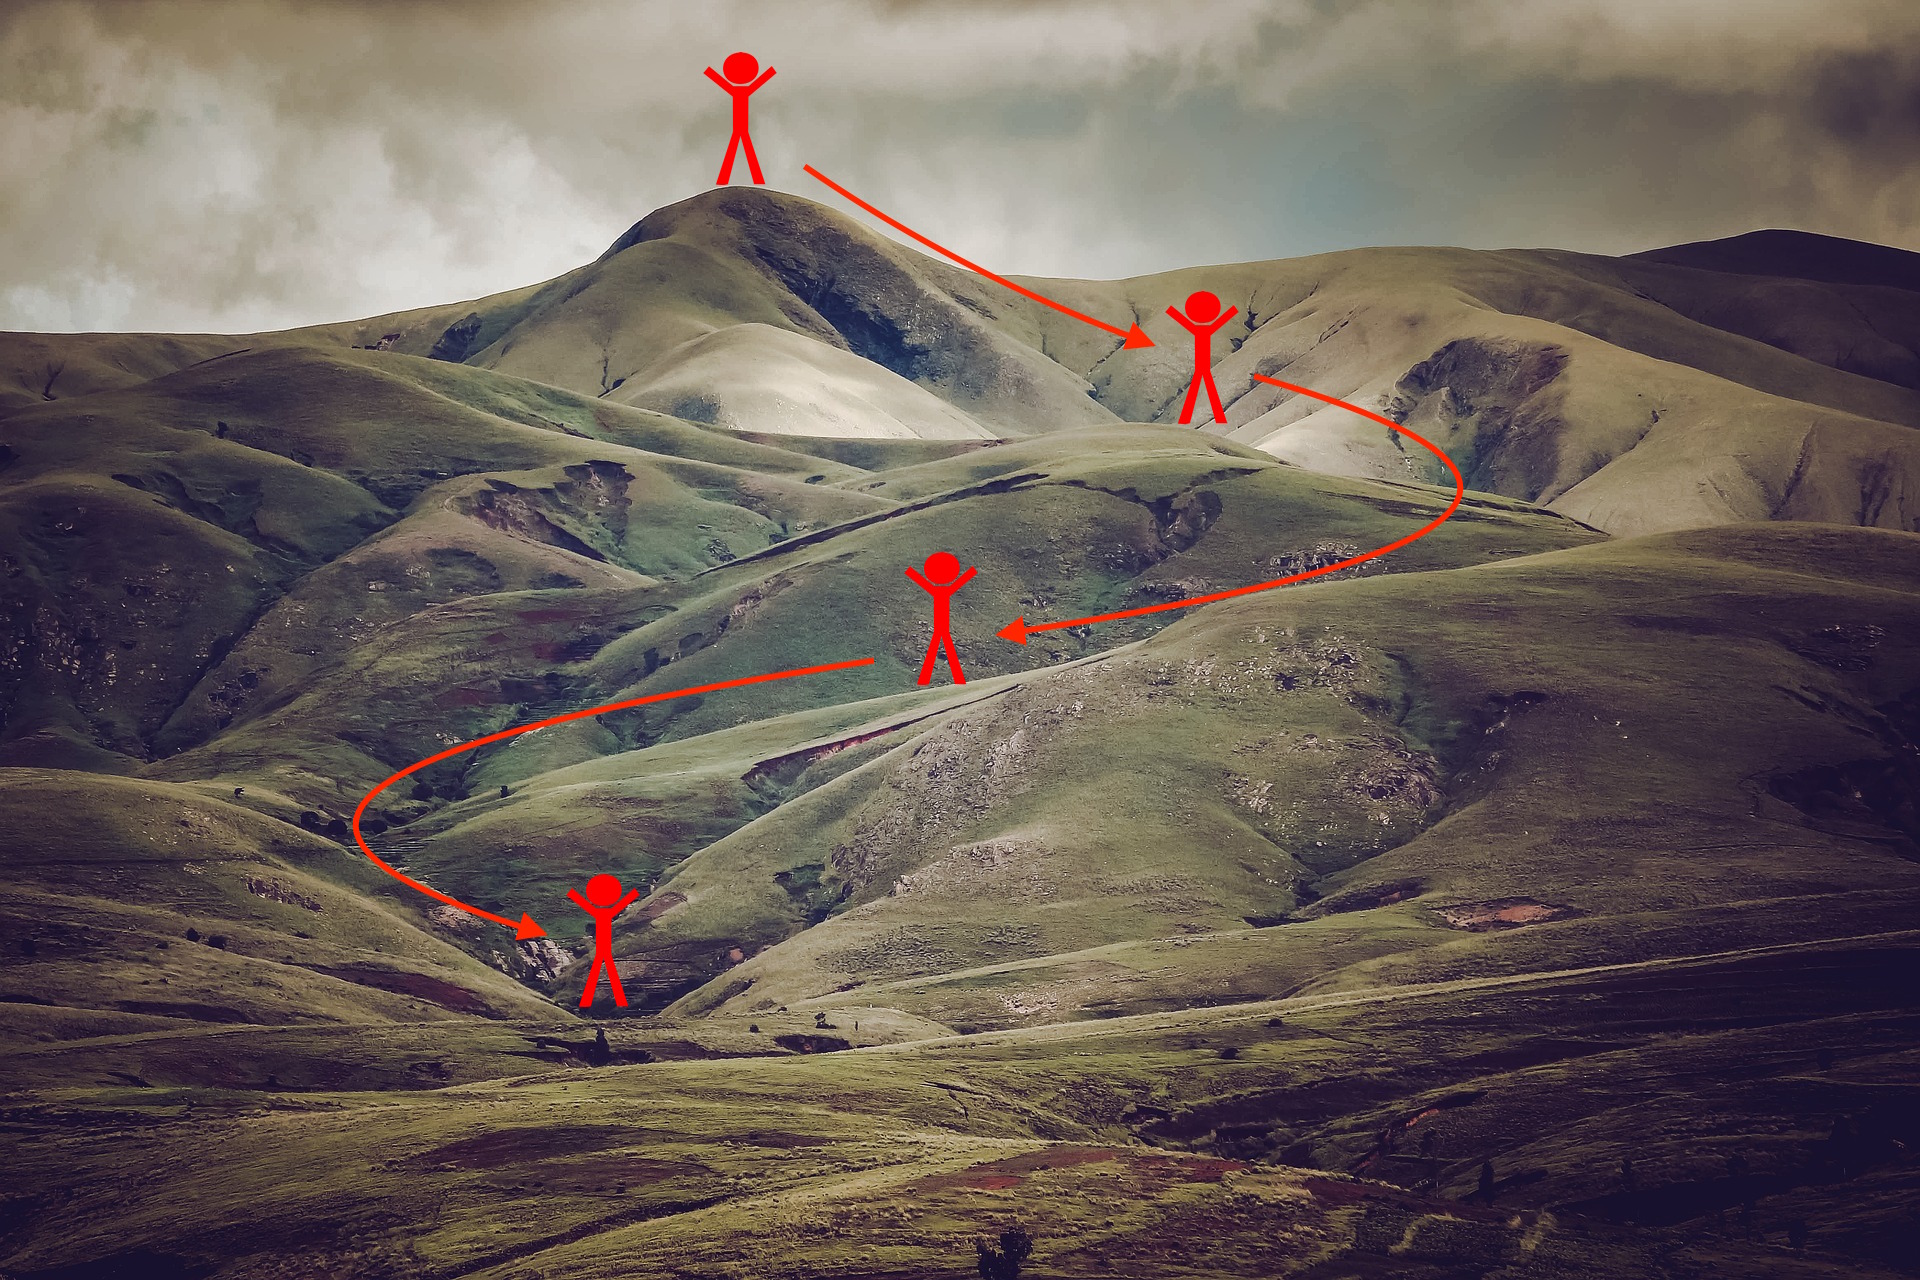

### 1. Gradient Descent
 
Gradient descent is an iterative approach to reach the solution. The word "iterative" means the procedure starts with an initial value and improves the solution sequentialy by following some numeric rules. In the figure, each iteration is a baby step, the solution is updated by those baby steps until the minimum point is reached. 

In gradient descent, that rule is simple: finding the direction to move down. In the other words, at each step of the training, parameters are updated by following a certain direction such that they are moving down to the lowest point for the cost function. Such direction is called "gradient".

In the perfect world, we certainly hope that graident descent the solution can be updated by keeping moving down until it arrives at the bottom and stop there. However, in the practice, what usually happens is that once the algorithm almost reaches to the bottom, it is so closed that the algorithm becomes moving very slowly (as the direction at that time will be almost flat). Once the movement is too slow, we consider that the algorithm "converges", and it is good to stop it. Even though the solution may not be at the exact bottom, it is still be acceptable because it is in such a small neighbour of the minimum point. 

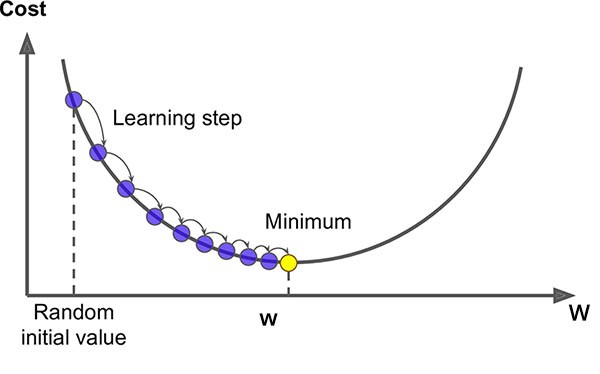

### 2. Stochastic Gradient Descent
The gradient descent is also called batch gradient descent. What that means is when we try to find the direction to move down, all the training data is taken into consideration. The direction is actually the average of graidents of all training examples. In the other words, for each baby step, we need to visit all examples to calculate their gradients and then take the average before moving down.

A variant of this is Stochastic Gradient Descent (SGD). SGD follows the same update rule as Gradient Descent. What changes is the way it finds the direction to move down: instead of calculating all training examples, you can compute the direction on just one training sample in each step. The sample is usually selected at random without replacement, that is why it is called Stochastic Gradient Descent.

SGD can run faster when the training data is large as it no longer need the whole data set to compute the gradient in each step.

Figure 1 shows the difference between (Batch) gradient descent and SGD.
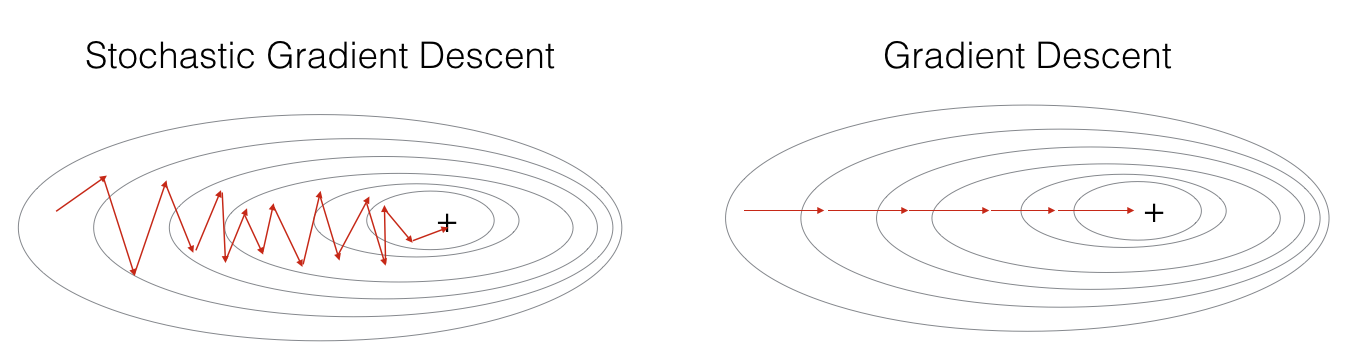
**Figure 1** : **SGD vs GD**
"+" denotes a minimum of the cost. SGD leads to many oscillations to reach convergence. But each step is a lot faster to compute for SGD than for GD, as it uses only one training example (vs. the whole batch for GD).



### 3. Mini-Batch Gradient descent

Both (Batch) Gradient descent and SGD have their own disadvantages: Gradient descent can find the gradient direct to the minimum point but it requires huge amount of computation. SGD is much faster to compute but it may lead to many oscillations before reaching the destination. 

Mini-Batch Gradient descent is a method that combines Gradient descent and SGD:  Such parts of tranining samples usually have the same size. At each step, the direction will be determined by one and only one part. For example, one can randomly split data into 10 mini-batch: mini-batch1, mini-batch2, ..., mini-batch10. In step1, direction is calculated by the average gradient of examples in mini-batch1; in step2, it will be based on mini-batch2 ... and so on.  

There is no common answer on determining the size of mini-batch (k). However, in the practice, people prefer sizes like 16, 32, 64, 128..., depends on the data size n. Note that when k=n, it is the regular Gradient descent; when k=1, it is equivalent to SGD. Figure 3 shows how mini-batch works compared with other two methods.
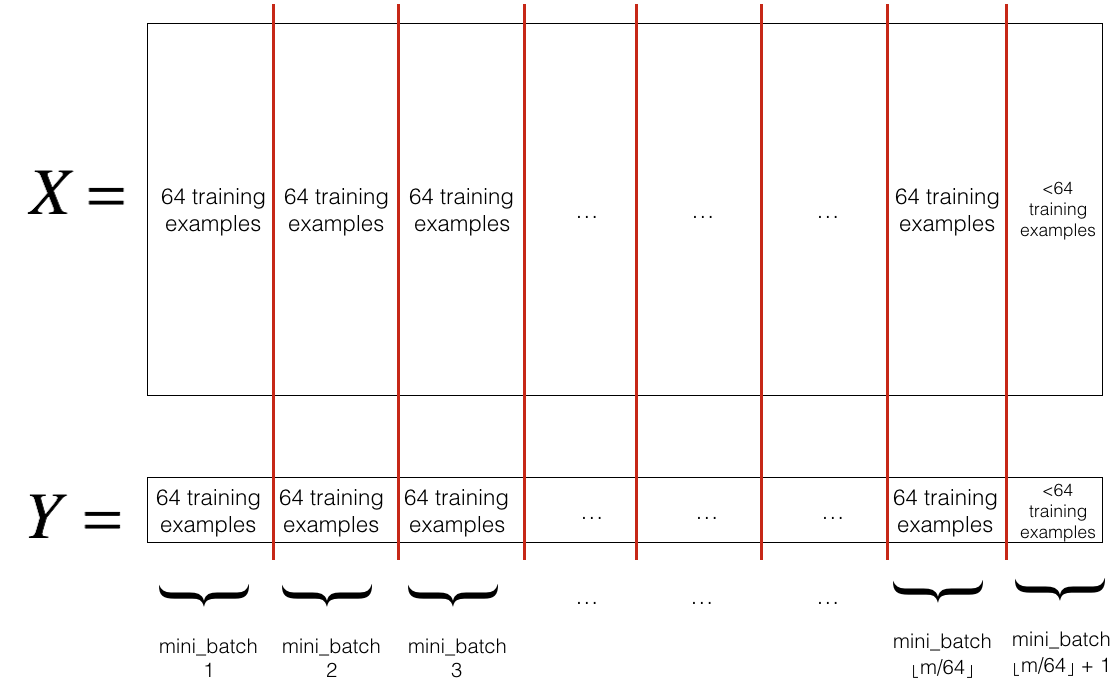
**Figure 3** : **Partition the whole examples into mini-batches**
Partition the shuffled (X, Y) into mini-batches of size k (here k=64). 


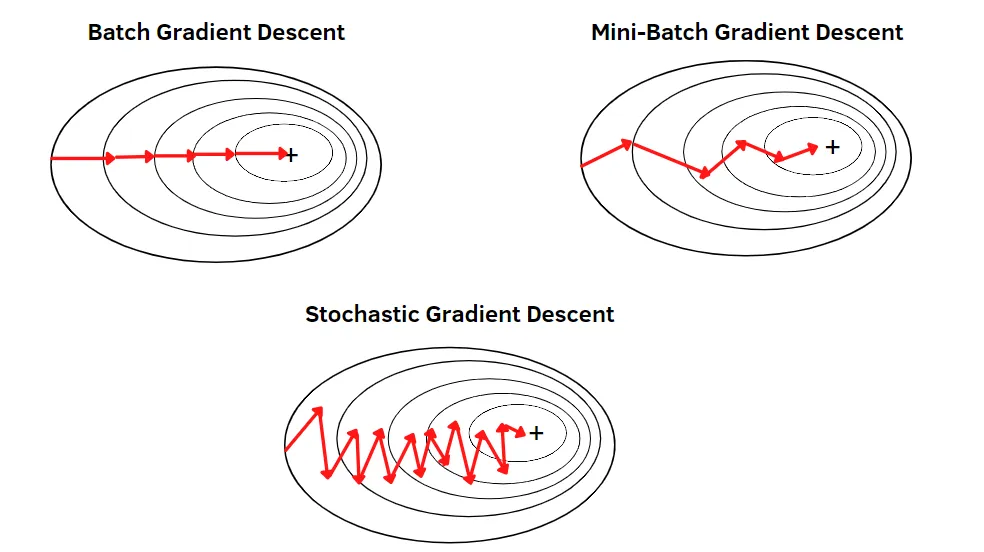
**Figure 4** : **Gradient descent vs SGD vs Mini-Batch GD**
"+" denotes a minimum of the cost. Using mini-batches in your optimization algorithm often leads to faster optimization than Gradient descent and smoother movement than SGD.

### 4. Momentum
Even though mini-batch gradient descent move more stable than SGD, the oscillate problem still exist (see Figure 4), the main reason is that each step relies on a different mini-batch, which may make moving directions back and forth. Such oscillation may still lead to the convergence but that variation certainly can be reduced.

One way to reduce oscillation is called Momentum. Momentum takes into account the previous moving directions to smooth out the update. In each step of Momentum, the moving direction is not only determined by gradient of current mini-batch, but also the exponentially weighted average of gradient in the previous steps. Figure 5 shows how Momentum smooth the gradient descent process.


**Figure 5**: The red arrows shows the direction taken by one step of mini-batch gradient descent with momentum. The blue points show the direction of the gradient (with respect to the current mini-batch) on each step. 

Similarly, the Momentum can also be applied to SGD, Figure 6 shows how past gradients from other points make the current direction smooth.

![maxresdefault.jpeg](https://github.com/guanshenwang/dscamp_public/blob/master/Project%20Object%20Recognition/Tutorials/img/momentum.jpeg?raw=true)


**With Momentum vs. Without Momentum**

An intersting video to compare momentum & without momentum in gradient descent.

https://www.youtube.com/watch?v=ZypmhnzH-AY

### 5. Adam
Adam, stands for adaptive moment estimation, is an adanvced optimization algorithm, but it is widely used to train neural network due to effectiveness. 

The Adam algorithm consider momentum effects in each update. Besides, the Adam also take RMSprop effect into account. In each step, the weighted average of past gradient (the first moment) and "squared" of gradient (the second moment) are calculated, both two are then used to determine the moving direction. 




Model with different optimization algorithms